## Exploratory Data Analysis (EDA)

This notebook explores learner behavior within the LMS using raw activity and quiz data.
The goal is to understand engagement patterns, learning progression, and completion behavior
before applying feature engineering or machine learning.

In [ ]:
# Import required libraries for data analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load CSV files into Pandas DataFrames

courses = pd.read_csv('/content/drive/MyDrive/Lumera data/lms_courses.csv')
activity = pd.read_csv('/content/drive/MyDrive/Lumera data/lms_lesson_activity.csv')
users = pd.read_csv('/content/drive/MyDrive/Lumera data/lms_users.csv')
modules = pd.read_csv('/content/drive/MyDrive/Lumera data/lms_modules.csv')
quiz = pd.read_csv('/content/drive/MyDrive/Lumera data/lms_quiz_attempts.csv')

In [ ]:
# Convert date columns to datetime format for time-based analysis

courses["created_at"] = pd.to_datetime(courses["created_at"])
users["created_at"] = pd.to_datetime(users["created_at"])
users["updated_at"] = pd.to_datetime(users["updated_at"])
activity["event_time"] = pd.to_datetime(activity["event_time"])
quiz["attempt_date"] = pd.to_datetime(quiz["attempt_date"])

### Data Preparation
Timestamps were converted to datetime format to enable time-based aggregation
and longitudinal analysis of learner behavior.

In [ ]:
 #Keep only rows where role == 'learner'
learners_only = users[users['role'].str.lower() == 'learner'].copy()

print(f"Remaining rows: {len(learners_only)}")

Remaining rows: 39


In [ ]:
learners_only

,user_id,first_name,last_name,email,department,role,created_at,updated_at
0,U001,Clemente,Zannotelli,czannotelli0@geocities.jp,Education,learner,2026-02-14,2026-02-02
2,U003,Billie,Broggini,bbroggini2@cnbc.com,Management,learner,2026-02-13,2026-02-13
3,U004,Godiva,Elecum,gelecum3@tinypic.com,Legal,learner,2026-02-08,2026-02-09
4,U005,Leisha,Ffoulkes,lffoulkes4@live.com,Management,learner,2026-02-01,2026-01-23
5,U006,Joyous,Simco,jsimco5@foxnews.com,Community,learner,2026-02-06,2026-01-18
6,U007,Thatch,Sahnow,tsahnow6@nasa.gov,Management,learner,2026-02-09,2026-01-15
7,U008,Celina,Lapslie,clapslie7@posterous.com,Management,learner,2026-02-07,2026-02-16
8,U009,Constantino,Smitten,csmitten8@github.io,Management,learner,2026-02-15,2026-01-12
10,U011,Sophey,Diggell,sdiggella@usnews.com,Community,learner,2026-02-13,2026-02-10
11,U012,Seana,Tregear,stregearb@businessweek.com,Community,learner,2026-02-04,2026-01-25


# Engagement & Progress Analysis

In [ ]:
# Count the number of unique learners who performed at least one activity
activity["user_id"].nunique()

46

In [ ]:
# Distribution of activity status
activity["status"].value_counts(normalize=True) * 100

,proportion
status,
in_progress,46.666667
completed,38.000000
started,15.333333


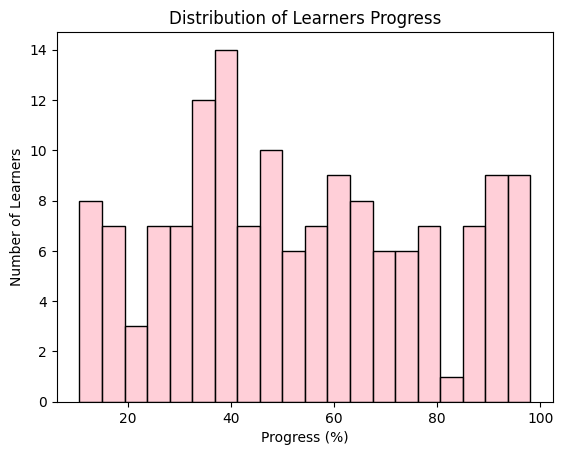

In [ ]:
# Visualize learner progress distribution
activity.columns= activity.columns.str.strip()
sns.histplot(activity["progress"], bins=20, color='pink')
plt.title("Distribution of Learners Progress")
plt.xlabel("Progress (%)")
plt.ylabel("Number of Learners")
plt.show()

### Learner Engagement
Most learners cluster at partial progress levels, indicating a significant
drop-off before full module completion.

# QUIZ PERFORMANCE ANALYSIS

In [ ]:
# Summary statistics of quiz scores
quiz["score"].describe()

,score
count,120.000000
mean,62.459833
std,22.199204
min,20.150000
25%,45.790000
50%,61.955000
75%,81.517500
max,99.160000


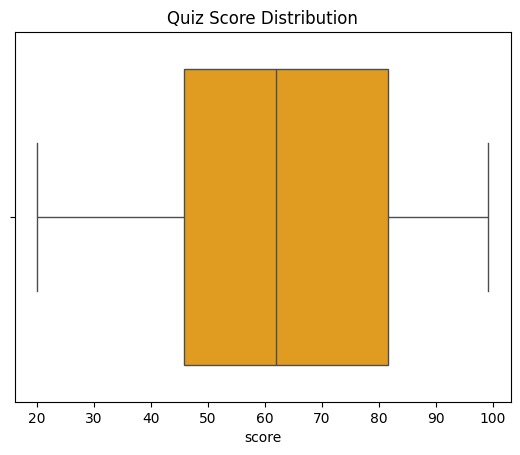

In [ ]:
# Visualize quiz score distribution
sns.boxplot(x=quiz["score"], color= 'orange')
plt.title("Quiz Score Distribution")
plt.show()

### Learning Performance
Quiz score distributions provide insight into learning effectiveness and
highlight potential content difficulty across modules.

In [ ]:
learners_only.to_csv('new_learners.csv', index=False)
print('new_learners.csv has been saved.')

new_learners.csv has been saved.
